## EDA

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Importing related modules
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt 
import pandas as pd 
import string
from PIL import Image
import numpy as np
import os
from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 

# check current working directory
os.getcwd()

'/content'

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# dataset SgCorpus, can extend the list if have more than one dataset in the future
DATA = ["SgCorpus"]

filename = './drive/My Drive/next-sentence-predictor/finalData/' + DATA[0] + '.txt'
doc = load_doc(filename)
print(doc[:505])

who is that smoking hot eurasian caucasian j1?? i heard he's in waterpolo
i have not made a confession before.sassy admin: here ya go!
there's this indian girl in neytiri. i think her name starts with a v and she was wearing a blue collegiate yesterday. she's really sweet and cute, especially when she laughs does anyone know who she is? i really want to get to know her before vday 
why do not they let the crashers play orientation games this year? suddenly so strict 
anyone knows that sassy indian gi


In [5]:
# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    # split into tokens by white space
    tokens = doc.split()

    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

In [6]:
# clean document
tokens = clean_doc(doc)
print(tokens[:50])

['who', 'is', 'that', 'smoking', 'hot', 'eurasian', 'caucasian', 'i', 'heard', 'hes', 'in', 'waterpolo', 'i', 'have', 'not', 'made', 'a', 'confession', 'beforesassy', 'admin', 'here', 'ya', 'go', 'theres', 'this', 'indian', 'girl', 'in', 'neytiri', 'i', 'think', 'her', 'name', 'starts', 'with', 'a', 'v', 'and', 'she', 'was', 'wearing', 'a', 'blue', 'collegiate', 'yesterday', 'shes', 'really', 'sweet', 'and', 'cute']


In [7]:
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

Total Tokens: 3968723
Unique Tokens: 116571


In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [9]:
stopwords = stopwords.words('english')

## Wordcloud

In [10]:
#Create comment words
comment_words = " ".join(tokens)+" "
#stopwords = set(STOPWORDS)
#stopwords.update(['will'])
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
#Set mask to show the cloud with the shape of Singapore as outline 
mask = np.array(Image.open('./drive/My Drive/next-sentence-predictor/singaporeMap.jpg'))

In [15]:
#Create a word cloud
wc = WordCloud(stopwords=stopwords,
               mask=mask, background_color="black",
               max_words=200, max_font_size=256,
               random_state=30, width=mask.shape[1],
               height=mask.shape[0]).generate(comment_words)

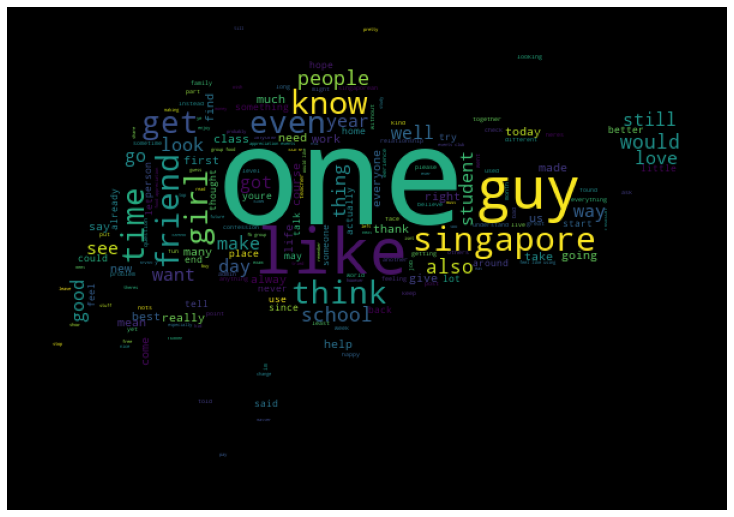

In [16]:
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc)
plt.axis("off") 
plt.tight_layout(pad = 0)
  
plt.show() 

## Word Count and Inverse Document Frequency

In [17]:
cvec = CountVectorizer(stop_words=stopwords, min_df=1, max_df=.5, ngram_range=(1,2))
cvec.fit(tokens)
list(islice(cvec.vocabulary_.items(), 20))
len(cvec.vocabulary_)
cvec_count = cvec.transform(tokens)

In [18]:
occ = np.asarray(cvec_count.sum(axis=0)).ravel().tolist()
count_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences' : occ})
term_freq = count_df.sort_values(by='occurrences', ascending=False).head(10)
print(term_freq)
print()
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_count)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weight_df = pd.DataFrame({'term' : cvec.get_feature_names(), 'weight' : weights})
tf_idf = weight_df.sort_values(by='weight', ascending=False).head(10)
print(tf_idf)

             term  occurrences
57500        like        16155
54640        know        11723
91377   singapore        11491
70804         one        11439
39626         get        11287
81698      really        10946
102972       time         9726
113520      would         9188
74780      people         9069
36584        food         7725

             term    weight
57500        like  0.004071
54640        know  0.002954
91377   singapore  0.002895
70804         one  0.002882
39626         get  0.002844
81698      really  0.002758
102972       time  0.002451
113520      would  0.002315
74780      people  0.002285
36584        food  0.001946
